### K Means Clustering

In [1]:
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Dataset

Target Variable is not Provided in Unsupervised Learning

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Arrange Data into Feature Matrix

Considering only Two Features for Better Visualization and Understanding

In [3]:
features = ['petal length (cm)','petal width (cm)']
X = df.loc[:, features].values

### Standardize the Data 

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
print(f'Mean : {scaler.mean_}\n')
print(f'Variance : {scaler.var_}\n')
print(f'Scales : {scaler.scale_}\n')
print(f'Number of Features : {scaler.n_features_in_}\n')
print(f'Number of Samples : {scaler.n_samples_seen_}\n')
print(f'Parameters : {scaler.get_params()}')

Mean : [3.758      1.19933333]

Variance : [3.09550267 0.57713289]

Scales : [1.75940407 0.75969263]

Number of Features : 2

Number of Samples : 150

Parameters : {'copy': True, 'with_mean': True, 'with_std': True}


### Plot Data to Estimate Number of Clusters 

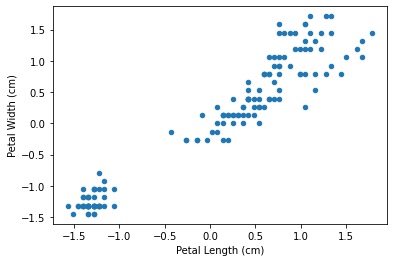

In [6]:
pd.DataFrame(X, columns=features).plot.scatter('petal length (cm)', 
                                               'petal width (cm)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)');

### K Mean Clustering

In [7]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

### Get Labels and Centroid

In [8]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

### Visually Evaluate the Clusters 

In [9]:
X = pd.DataFrame(X, columns=features)

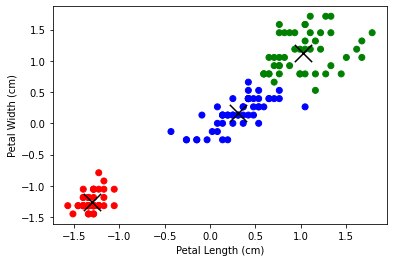

In [10]:
colormap = np.array(['r','g','b'])
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[labels])
plt.scatter(centroids[:,0], 
            centroids[:,1], 
            s=300, 
            marker='x', 
            c='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)');

### Visually Evaluate the Clusters and Compare Species

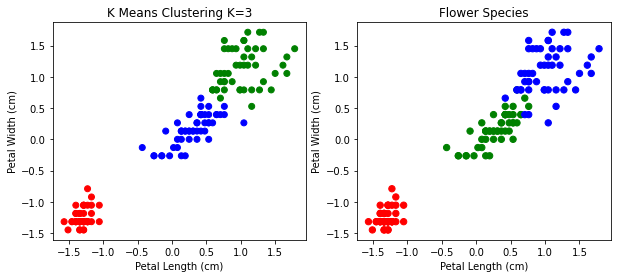

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X['petal length (cm)'], 
            X['petal width (cm)'], 
            c=colormap[labels])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K Means Clustering K=3')

plt.subplot(1,2,2)
plt.scatter(X['petal length (cm)'], 
            X['petal width (cm)'], 
            c=colormap[iris.target], 
            s=40)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Flower Species');